In [2]:
# import library

from keras.applications.vgg16 import VGG16

#deklarasikan modelyang akan dipakai
model = VGG16()

# Tampilkan layer layer VGG16
model.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

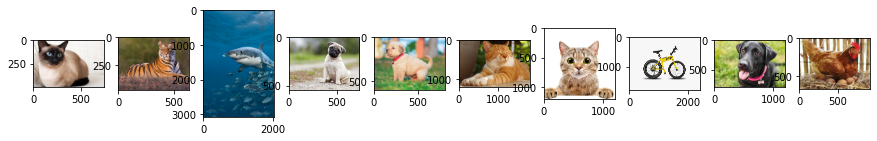

(10, 224, 224, 3)


In [14]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://asset.kompas.com/crops/ruku_0kbJPKc_lcbUoPzcuUUCC4=/100x67:900x600/750x500/data/photo/2022/05/17/6283087d99d4c.jpg")
# urls.append("https://www.ruparupa.com/blog/wp-content/uploads/2021/10/anjing-chihuahua-2.jpg")
urls.append("https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg")
urls.append("https://i.natgeofe.com/k/d21630fa-3ab9-4e37-adea-c503629e49d4/great_white_smile_2x3.jpg")
urls.append("https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-732x549-thumbnail-732x549.jpg")
urls.append("https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d")
urls.append("https://media.wired.com/photos/61afb905d184762c75e00411/master/pass/Gear-Jackbrabbit-Bike-Yellow-top.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")


imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) # Download kemudian dikonversi menjadi gambar
  img = np.array(Image.open(r.raw)) #konversi ke np array
  plt.subplot(1,len(urls),u+1) #menampilkan ke matplotlib
  plt.imshow(img) # menampilkan gambar ke matplotlib
  img = cv2.resize(img,(224,224)) # mengubah ukuran sesaui inpot VGG16 (harus dirseize)
  imgs.append(img) # mengumpulkan seuma image yang telah dipreproses ke imgs
plt.show() # menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)




VGG 16 memiliki target 1000 kelas https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

Kelas anjing: 151 (Chihuahua) - 268 (Mexican hairless)

Kelas kucing: 281 (tabby cat) - 287 (lynx)


In [15]:
pred = model.predict(imgs)
for i in range(len(urls)):
  if (np.argmax(pred[i]) > 150 and np.argmax(pred[i]) < 269):
    print("This is kind of dog")
  elif (np.argmax(pred[i]) >280 and np.argmax(pred[i]) <287):
    print("This is kind of cat")
  else:
    print("Not kind of cat or dog")

1/1 [==============================] - 7s 7s/step
This is kind of cat
Not kind of cat or dog
Not kind of cat or dog
This is kind of dog
This is kind of dog
This is kind of cat
This is kind of cat
Not kind of cat or dog
This is kind of dog
Not kind of cat or dog


In [17]:
pred.shape

(10, 1000)

gimana kita tahu dari 1000 angka/data ini mana yang menunjukkan kucing pada Neural Network?



In [19]:
pred[0] 

array([2.29853847e-09, 2.70860379e-09, 1.27666041e-07, 2.12764036e-07,
       6.74093371e-07, 4.95237373e-07, 1.16907017e-08, 1.87930738e-09,
       4.88714624e-10, 3.47789263e-11, 9.05107586e-11, 2.83977026e-11,
       7.14294041e-11, 3.94811250e-09, 6.98153479e-11, 3.43734485e-09,
       1.51255151e-08, 3.73444948e-07, 2.28144863e-08, 2.89288815e-10,
       6.45594356e-10, 5.47968693e-09, 3.05560820e-11, 3.03378600e-10,
       3.23962346e-09, 3.40406175e-10, 4.29535546e-10, 1.84234239e-10,
       2.91408919e-09, 2.21979901e-09, 3.37420369e-10, 2.81700052e-10,
       1.92667854e-10, 7.59532923e-11, 7.16237181e-10, 3.86363275e-10,
       1.05614806e-09, 3.57389807e-09, 2.65111266e-09, 8.76470979e-11,
       2.43484499e-09, 4.04638101e-10, 2.08246559e-10, 7.92912680e-10,
       4.26986402e-09, 7.57997415e-11, 1.35692648e-08, 2.15829310e-09,
       1.11033821e-11, 1.55760977e-11, 3.82201354e-11, 8.38406152e-07,
       1.72155545e-09, 1.03203079e-09, 7.82017917e-09, 3.97534394e-10,
      

In [21]:
np.argmax(pred[0])

285